# Import Necessary Libraries and Modules

In [32]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

data = pd.read_csv('breast-cancer.csv')
df = pd.DataFrame(data)
newdata = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]


# Data Splitting

In [33]:
X = newdata.drop(["diagnosis"], axis=1)
y = data['diagnosis']

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [34]:
# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)  # Increase max_iter if the model doesn't converge
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)


## Accuracy Score + Classification Report for Logistic Regression

In [35]:
# Calculate accuracy and print a classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", round(accuracy*100,2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the logistic regression model's coefficients and intercept
print("Coefficients:\n", logreg.coef_)

print("Classification Accuracy in test data \t:" , logreg.score(X_test, y_test))


Accuracy:  92.98

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.93      0.94        71
           M       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Coefficients:
 [[-2.41427405  0.23373207  0.56836231 -0.00469744  0.49290349  0.70219093
   1.18188578  0.76520712  0.582189    0.11110804]]
Classification Accuracy in test data 	: 0.9298245614035088


# Confusion Matrix + TPR + FPR


TPR for test	: 0.9302325581395349
FPR for test	: 0.07042253521126761


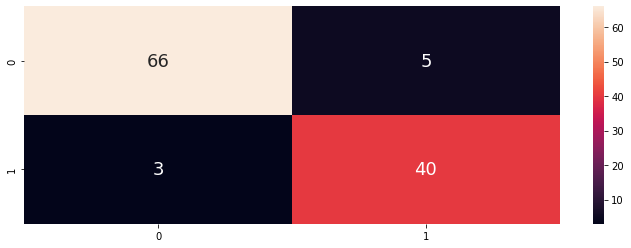

In [36]:
def binary_metric(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR


[TPR1_test, FPR1_test] = binary_metric(y_test, y_pred)
print()
print("TPR for test\t:", [TPR1_test, FPR1_test][0])
print("FPR for test\t:", [TPR1_test, FPR1_test][1])

f, axes = plt.subplots(1, 1, figsize=(12, 4)) 
sn.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
plt.show()



# Decision Tree Model

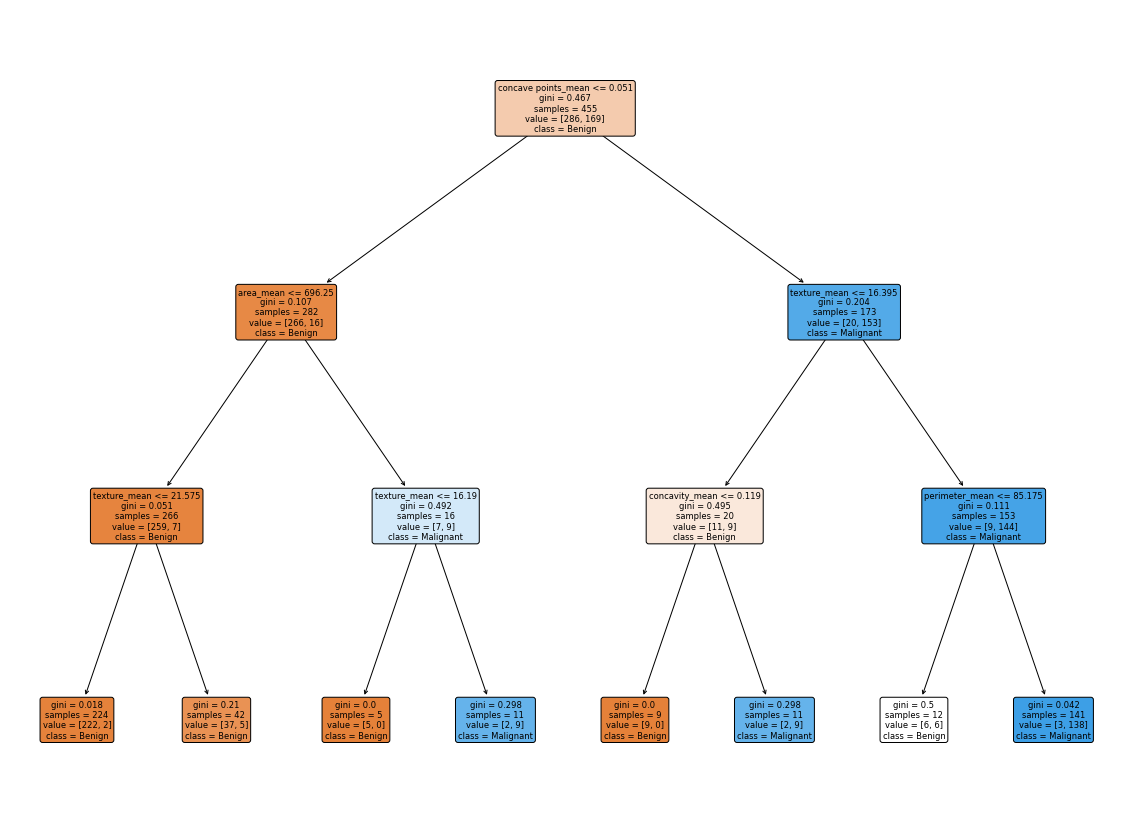

In [37]:
# Create a decision tree classifier with custom hyperparameters
dtree = DecisionTreeClassifier(max_depth=3)

# Train the classifier
dtree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_decision = dtree.predict(X_test)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(dtree, filled=True, rounded=True,  feature_names=X_train.columns, class_names=['Benign', 'Malignant'])
plt.show()


## Accuracy Score and Classification Report for Decision Tree

In [38]:
accuracy = accuracy_score(y_test, y_pred_decision)
print('Accuracy:', round(accuracy*100,2))
print('Classification Report:')
print(classification_report(y_test, y_pred_decision))
print(dtree.feature_importances_)


Accuracy: 95.61
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[0.         0.0772049  0.02796359 0.04787351 0.         0.
 0.03656113 0.81039686 0.         0.        ]


# Random Forest Classifier Model

In [39]:
rf = RandomForestClassifier(n_estimators=200, random_state=190)

# train the classifier on the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred_forest = rf.predict(X_test)

# Calculate accuracy and print a classification report
accuracy1 = accuracy_score(y_test, y_pred_forest)
print("Accuracy: ", round(accuracy1*100,2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))

print("Classification Accuracy in test data \t:" , rf.score(X_test, y_test))


Accuracy:  94.74

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification Accuracy in test data 	: 0.9473684210526315


# Confusion Matrix + TPR + FPR

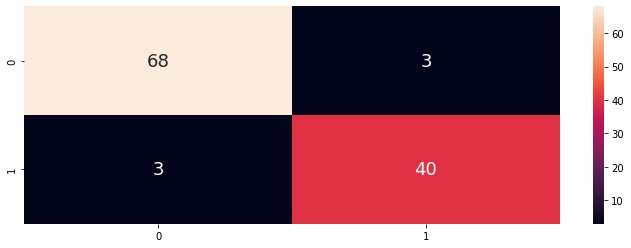


TPR for test	: 0.9302325581395349
FPR for test	: 0.04225352112676056


In [40]:
# evaluate the performance of the classifier

f, axes = plt.subplots(1, 1, figsize=(12, 4)) 
sn.heatmap(confusion_matrix(y_test, y_pred_forest), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
plt.show()

[TPR2_test, FPR2_test] = binary_metric(y_test, y_pred_forest)
print()
print("TPR for test\t:", [TPR2_test, FPR2_test][0])
print("FPR for test\t:", [TPR2_test, FPR2_test][1])